---
title: "Problem set #7: resampling and nonlinearity"
---
author: Zhuo Leng
-----

-------

Part 1: Sexy Joe Biden (redux) [4 points]
----------

1.Estimate the training MSE of the model using the traditional approach.
Fit the linear regression model using the entire dataset and calculate the mean squared error for the training set.

In [12]:
library(tidyverse)
library(modelr)
library(broom)
# install.packages('rcfss')
# library(rcfss)

set.seed(1234)

options(digits = 3)

theme_set(theme_minimal())


In [21]:
biden_data <- read.csv(file = "biden.csv", header = T)
attach(biden_data)

biden_data <- biden_data %>%
  tbl_df()
#biden_data

lm.fit1 <- lm(biden ~ age + female + educ + dem + rep, data = biden_data )
summary(lm.fit1)


Call:
lm(formula = biden ~ age + female + educ + dem + rep, data = biden_data)

Residuals:
   Min     1Q Median     3Q    Max 
-75.55 -11.29   1.02  12.78  53.98 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  58.8113     3.1244   18.82  < 2e-16 ***
age           0.0483     0.0282    1.71    0.088 .  
female        4.1032     0.9482    4.33  1.6e-05 ***
educ         -0.3453     0.1948   -1.77    0.076 .  
dem          15.4243     1.0680   14.44  < 2e-16 ***
rep         -15.8495     1.3114  -12.09  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.9 on 1801 degrees of freedom
Multiple R-squared:  0.282,	Adjusted R-squared:  0.28 
F-statistic:  141 on 5 and 1801 DF,  p-value: <2e-16


From the table above, we could know the estimate coefficients and std.error for lm.fit1.

In [24]:
##mse function
mse <- function(model, data) {
  x <- modelr:::residuals(model, data)
  mean(x ^ 2, na.rm = TRUE)
}
mse(lm.fit1, biden_data)    # linear model lm.fit1

[1] 395

The mean square error for training set is 395.270169278648

2.Estimate the test MSE of the model using the validation set approach.

In [210]:
### 2. Estimate the test MSE of the model using the validation set approach.
set.seed(1234)
biden_split <- resample_partition(biden_data, c(test = 0.3, train = 0.7))

lm.fit2 <- lm(biden ~ age + female + educ + dem + rep, data = biden_split$train)
summary(lm.fit2)


Call:
lm(formula = biden ~ age + female + educ + dem + rep, data = biden_split$train)

Residuals:
   Min     1Q Median     3Q    Max 
 -75.8  -10.7    0.9   12.9   53.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  57.3374     3.6977   15.51  < 2e-16 ***
age           0.0373     0.0336    1.11  0.26770    
female        4.1721     1.1267    3.70  0.00022 ***
educ         -0.2602     0.2322   -1.12  0.26275    
dem          16.3277     1.2766   12.79  < 2e-16 ***
rep         -14.6070     1.5580   -9.38  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.9 on 1259 degrees of freedom
Multiple R-squared:  0.279,	Adjusted R-squared:  0.276 
F-statistic: 97.3 on 5 and 1259 DF,  p-value: <2e-16


In [211]:
mse(lm.fit2, biden_split$test)    # linear model lm.fit2

[1] 400

The test MSE is 399.83030289036. Compare to training set mse in step1 395.270169278648, the mse increase. This indicate that the model fits on the training set data perhaps not that good fit on test set of data.

3.Repeat the validation set approach 100 times, using 100 different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [214]:
##3.repeat validation set approach 100 times

mse_variable <- function(biden_data){
  biden_split <- resample_partition(biden_data, c(test = 0.3, train = 0.7))
  mse = mse(lm.fit2, biden_split$test)
  return(mse)
}

rerun(100, mse_variable(biden_data))



[[1]]
[1] 394

[[2]]
[1] 391

[[3]]
[1] 379

[[4]]
[1] 395

[[5]]
[1] 387

[[6]]
[1] 390

[[7]]
[1] 387

[[8]]
[1] 368

[[9]]
[1] 364

[[10]]
[1] 416

[[11]]
[1] 383

[[12]]
[1] 386

[[13]]
[1] 358

[[14]]
[1] 410

[[15]]
[1] 413

[[16]]
[1] 374

[[17]]
[1] 391

[[18]]
[1] 397

[[19]]
[1] 385

[[20]]
[1] 393

[[21]]
[1] 341

[[22]]
[1] 369

[[23]]
[1] 336

[[24]]
[1] 425

[[25]]
[1] 390

[[26]]
[1] 383

[[27]]
[1] 421

[[28]]
[1] 381

[[29]]
[1] 390

[[30]]
[1] 388

[[31]]
[1] 466

[[32]]
[1] 418

[[33]]
[1] 373

[[34]]
[1] 440

[[35]]
[1] 373

[[36]]
[1] 361

[[37]]
[1] 379

[[38]]
[1] 416

[[39]]
[1] 356

[[40]]
[1] 374

[[41]]
[1] 374

[[42]]
[1] 411

[[43]]
[1] 385

[[44]]
[1] 397

[[45]]
[1] 437

[[46]]
[1] 385

[[47]]
[1] 396

[[48]]
[1] 408

[[49]]
[1] 417

[[50]]
[1] 418

[[51]]
[1] 415

[[52]]
[1] 387

[[53]]
[1] 374

[[54]]
[1] 402

[[55]]
[1] 422

[[56]]
[1] 379

[[57]]
[1] 399

[[58]]
[1] 417

[[59]]
[1] 404

[[60]]
[1] 363

[[61]]
[1] 425

[[62]]
[1] 419

[[63]]
[1] 405

[[64]]
[1] 380

[[65]]
[1] 403

[[66]]
[1] 405

[[67]]
[1] 394

[[68]]
[1] 412

[[69]]
[1] 416

[[70]]
[1] 407

[[71]]
[1] 407

[[72]]
[1] 391

[[73]]
[1] 383

[[74]]
[1] 386

[[75]]
[1] 454

[[76]]
[1] 422

[[77]]
[1] 406

[[78]]
[1] 422

[[79]]
[1] 418

[[80]]
[1] 407

[[81]]
[1] 399

[[82]]
[1] 411

[[83]]
[1] 391

[[84]]
[1] 405

[[85]]
[1] 397

[[86]]
[1] 376

[[87]]
[1] 382

[[88]]
[1] 413

[[89]]
[1] 443

[[90]]
[1] 417

[[91]]
[1] 424

[[92]]
[1] 377

[[93]]
[1] 386

[[94]]
[1] 398

[[95]]
[1] 408

[[96]]
[1] 401

[[97]]
[1] 393

[[98]]
[1] 378

[[99]]
[1] 385

[[100]]
[1] 400

MSE mostly fall in 360~460. This method is more accurate then only doing one time validation. We could calculate the mean mse of 100 times as the result. This could limit bias.

4.Estimate the test MSE of the model using the leave-one-out cross-validation (LOOCV) approach. Comment on the results obtained.

In [54]:
## 4. leave-one-out cross-validation (LOOCV) 
loocv_data <- crossv_kfold(biden_data, k = nrow(biden_data))

loocv_models <- map(loocv_data$train, ~ lm(biden ~ age + female + educ + dem + rep, data = .))
loocv_mse <- map2_dbl(loocv_models, loocv_data$test, mse)
mean(loocv_mse)

[1] 398

The test MSE of the model using the leave-one-out cross validation approach is 397.955504554888. The speed of LOOCV is faster than run 100 times validation approach. And it's MSE is very stable.

5.Estimate the test MSE of the model using the $10$-fold cross-validation approach. Comment on the results obtained.

In [215]:
##$10$-fold cross-validation approach

set.seed(1234)
cv10_data <- crossv_kfold(biden_data, k = 10)

cv10_models <- map(cv10_data$train, ~ lm(biden ~ age + female + educ + dem + rep, data = .))
cv10_mse <- map2_dbl(cv10_models, cv10_data$test, mse)
mean(cv10_mse)


[1] 398

The result of 10-fold cross validation is 396.928796280458, which is similar to the result got by LOOCV. However, the speed of 10-fold cross validation is much faster than LOOCV. This approach is more efficient when calculate mse.

In [216]:
##$10$-fold cross-validation approach

cv10_data2 <- crossv_kfold(biden_data, k = 10)

cv_error_fold10_2 <- vector("numeric", 100)
terms <- 1:100

for(i in terms){
  cv10_models2 <- map(cv10_data2$train, ~ lm(biden ~ age + female + educ + dem + rep, data = .))
  cv10_mse2 <- map2_dbl(cv10_models2, cv10_data2$test, mse)
  cv_error_fold10_2[[i]] <- mean(cv10_mse2)
}

mean(cv_error_fold10_2)



[1] 399

The mean MSE of 100 times is 398.532258630613, the value is very similar to the LOOCV approach.

7.Compare the estimated parameters and standard errors from the original model in step 1 (the model estimated using all of the available data) to parameters and standard errors estimated using the bootstrap ($n = 1000$).


In [66]:
###7.bootstrap

# traditional parameter estimates and standard errors
tidy(lm.fit1)

### bootstrapped estimates of the parameter estimates and standard errors
biden_boot <- biden_data %>%
  modelr::bootstrap(1000) %>%
  mutate(model = map(strap, ~ lm(biden ~ age + female + educ + dem + rep, data = .)),
         coef = map(model, tidy))

biden_boot %>%
  unnest(coef) %>%
  group_by(term) %>%
  summarize(est.boot = mean(estimate),
            se.boot = sd(estimate, na.rm = TRUE))

term,estimate,std.error,statistic,p.value
(Intercept),58.8113,3.1244,18.82,2.69e-72
age,0.0483,0.0282,1.71,8.77e-02
female,4.1032,0.9482,4.33,1.59e-05
educ,-0.3453,0.1948,-1.77,7.64e-02
dem,15.4243,1.0680,14.44,8.14e-45
rep,-15.8495,1.3114,-12.09,2.16e-32


term,est.boot,se.boot
(Intercept),58.9618,2.9499
age,0.0476,0.0285
dem,15.4294,1.1110
educ,-0.3512,0.1920
female,4.0755,0.9488
rep,-15.8871,1.4315


The difference betweent the estimates from bootstrap is not that much to the original model in step 1. The std errors of bootstrap for age, demale, rep, dem variables are slightly highter than that in original model. The std error of bootstrp of educ is a little bit lower than that in original model. This is because bootstrap doesn't rely on distributional assumptions.

Part 2: College (bivariate) [3 points]
-----------
------------
first predictor: Expend
--------------


In [69]:
college_data <- read.csv(file = "College.csv", header = T)
head(college_data)
attach(college_data)

Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


For the no transformation model, I choose Expend value as predictor.


Call:
glm(formula = Outstate ~ Expend, data = college_data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-15781   -2089      58    2011    7785  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.43e+03   2.25e+02    24.2   <2e-16 ***
Expend      5.18e-01   2.05e-02    25.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 8870412)

    Null deviance: 1.2559e+10  on 776  degrees of freedom
Residual deviance: 6.8746e+09  on 775  degrees of freedom
AIC: 14640

Number of Fisher Scoring iterations: 2


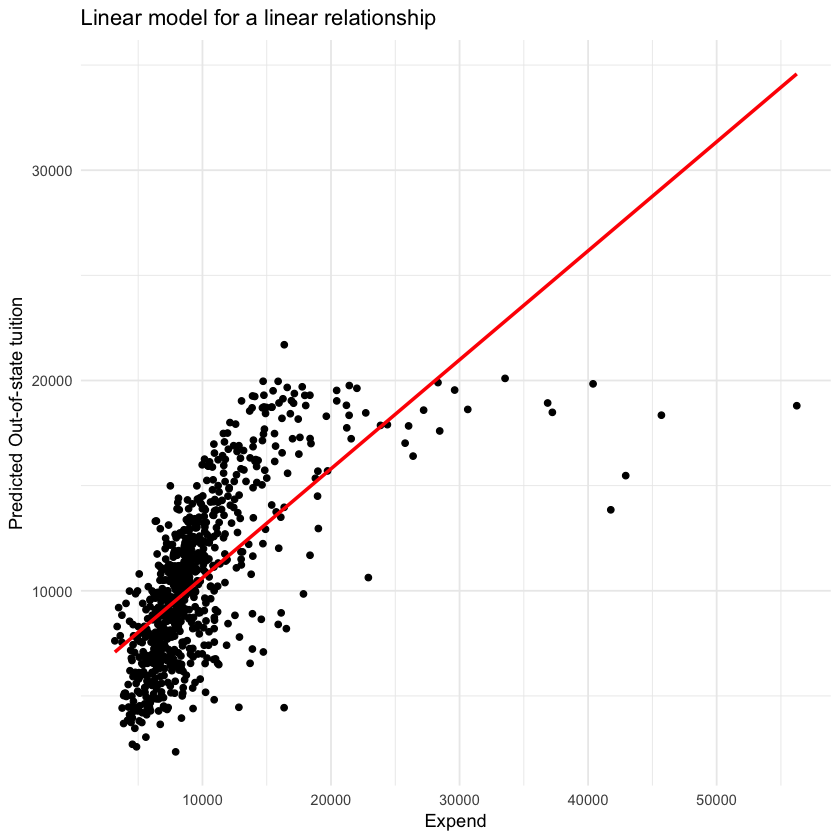

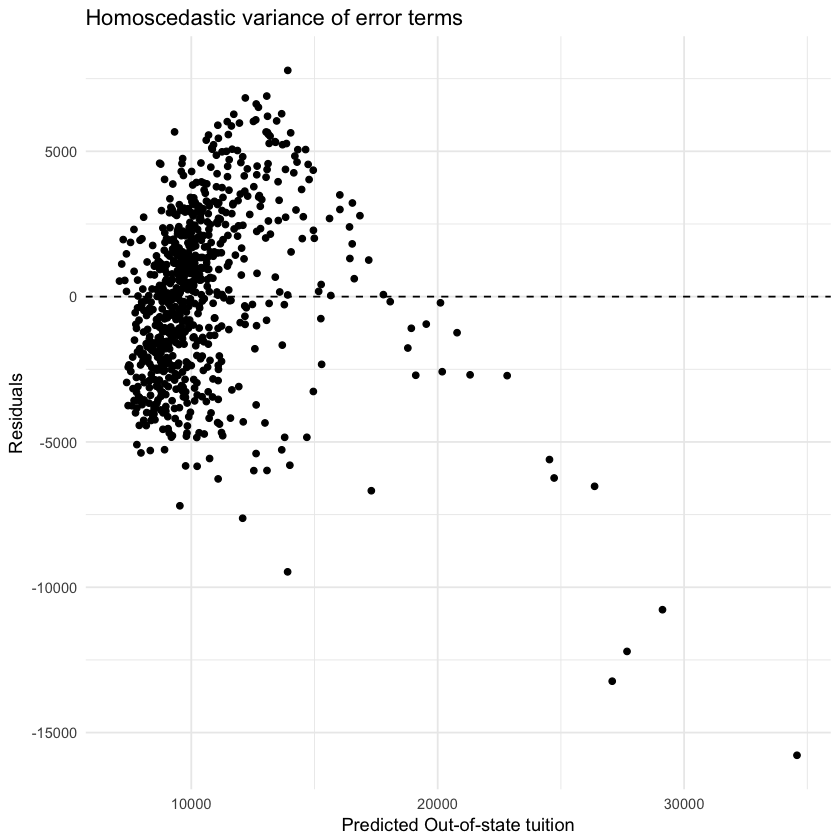

In [147]:
# ###first model: No transformation
model1 <- glm(Outstate ~ Expend, data = college_data)
summary(model1)

grid1 <- college_data %>%
  add_predictions(model1) %>%
  add_residuals(model1) 


##plot
ggplot(grid1, aes(Expend)) +
  geom_point(aes(y = Outstate)) +
  geom_smooth(method = "lm", aes(y = pred), color = 'red') +
  labs(title = "Linear model for a linear relationship", y = "Predicted Out-of-state tuition")

ggplot(grid1, aes(x = pred)) +
  geom_point(aes(y = resid)) +
  geom_hline(yintercept = 0, linetype = 2) +
  labs(title = "Homoscedastic variance of error terms",
        x = "Predicted Out-of-state tuition",
        y = "Residuals")

In order to find the statistics relationship between Expand(Instructional expenditure per student) and Outstate tuition, I first fit a simple no transformation linear model 
$$Outstate = \beta_{0} + \beta_{1} * Expand +\epsilon$$
From the summary table, we could know the coefficient of Expand is 5.18e-01, which means with one unit increase in Expand, the Outstate tuition will increase 5.18e-01. The p-valeu < 0.05, and this could testify the statistics significant of Expand predictor. The residuals seem to be randomly located around 0. However, from the first plot, we could see that the data still not that fit the model.


In [93]:
##$10$-fold cross-validation approach

cv10_college_data <- crossv_kfold(college_data, k = 10)
cv10_college_model <- map(cv10_college_data$train, ~ lm(Outstate ~ Expend, data = .))
cv10_college_mse <- map2_dbl(cv10_college_model, cv10_college_data$test, mse)
mean(cv10_college_mse)


[1] 9289485

Then after using 10-fold cross-validation methods, we get the mse = 9289484.55337569.

From the plot, and Bulging Rule, now we try to do monotonic transformation--log(x) transformation.


Call:
glm(formula = Outstate ~ log(Expend), data = college_data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-10651   -1572     100    1806    6604  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -57502       2090   -27.5   <2e-16 ***
log(Expend)     7482        230    32.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 6847844)

    Null deviance: 1.2559e+10  on 776  degrees of freedom
Residual deviance: 5.3071e+09  on 775  degrees of freedom
AIC: 14439

Number of Fisher Scoring iterations: 2


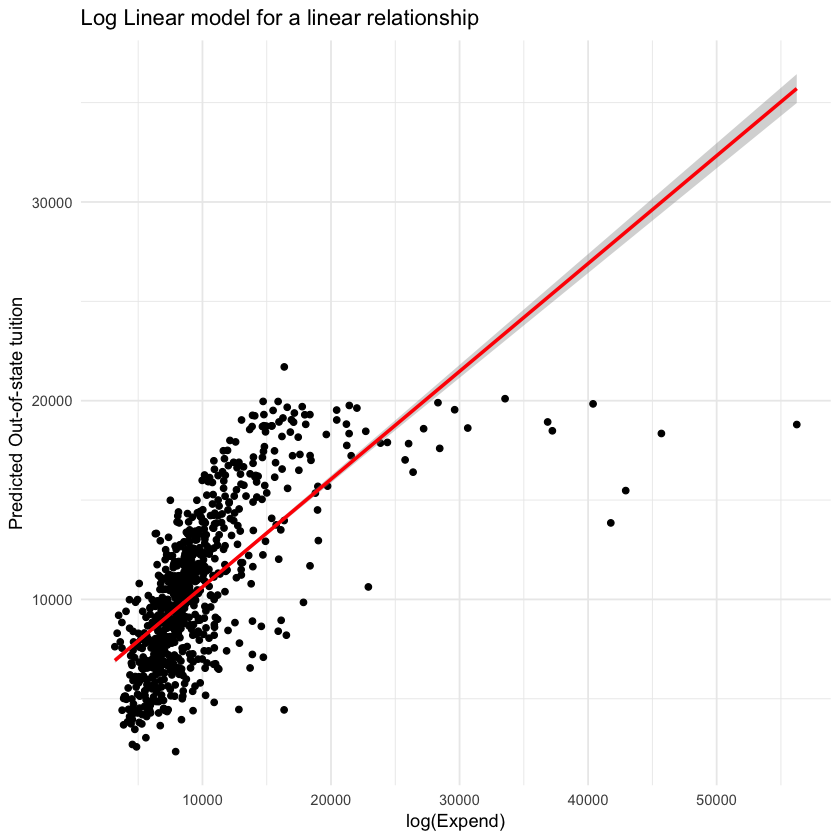

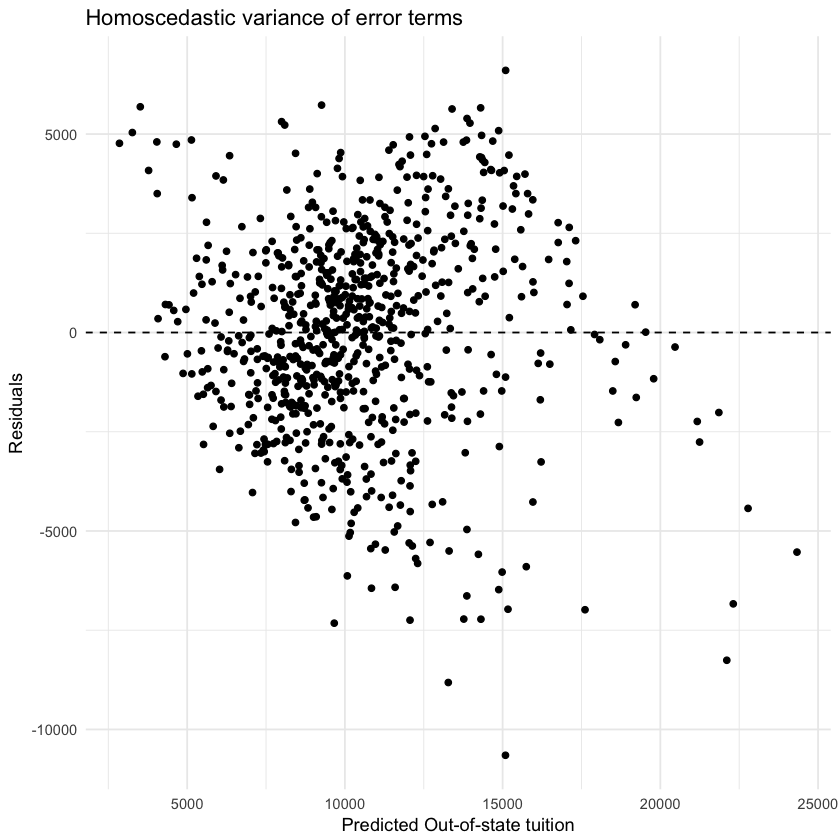

In [151]:
##Monotonic transformation--log(x) transformation
model2 <- glm(Outstate ~ log(Expend), data = college_data)
summary(model2)

grid2 <- college_data %>%
  add_predictions(model2, var = "pred2") %>%
  add_residuals(model2)


#plot
ggplot(grid2, aes(x = Expend)) +
  geom_point(aes(y = Outstate)) +
  geom_smooth(method = "lm", aes(y = pred2), color = 'red') +
  labs(title = "Log Linear model for a linear relationship",
        x = "log(Expend)",
        y = "Predicted Out-of-state tuition")

ggplot(grid2, aes(x = pred2)) +
  geom_point(aes(y = resid)) +
  geom_hline(yintercept = 0, linetype = 2) +
  labs(title = "Homoscedastic variance of error terms",
        x = "Predicted Out-of-state tuition",
        y = "Residuals")



In order to find the statistics relationship between Expand(Instructional expenditure per student) and Outstate tuition, I first fit a simple no transformation linear model 
$$Outstate = \beta_{0} + \beta_{1} * log(Expand) +\epsilon$$
From the summary table, we could know the coefficient of Expand is 7482, which means with one unit increase in log(Expand), the Outstate tuition will increase 7482. The p-valeu < 0.05, and this could testify the statistics significant of Expand predictor. Also, the residual seem to be randomly located.

In [163]:
##$10$-fold cross-validation approach

cv10_college_model2 <- map(cv10_college_data$train, ~ lm(Outstate ~ log(Expend), data = .))
cv10_college_mse2 <- map2_dbl(cv10_college_model2, cv10_college_data$test, mse)
log_mse <- mean(cv10_college_mse2)
log_mse

[1] 6908134

The 10-fold cross-validation methods generate mse = 6890220.52725771, which decrease a lot compare with mse of the model1 = 9289484.55337569. So this model is better then the last one. Then we want to know if polynomial transformation better by test the 10 -fold CV MSE.

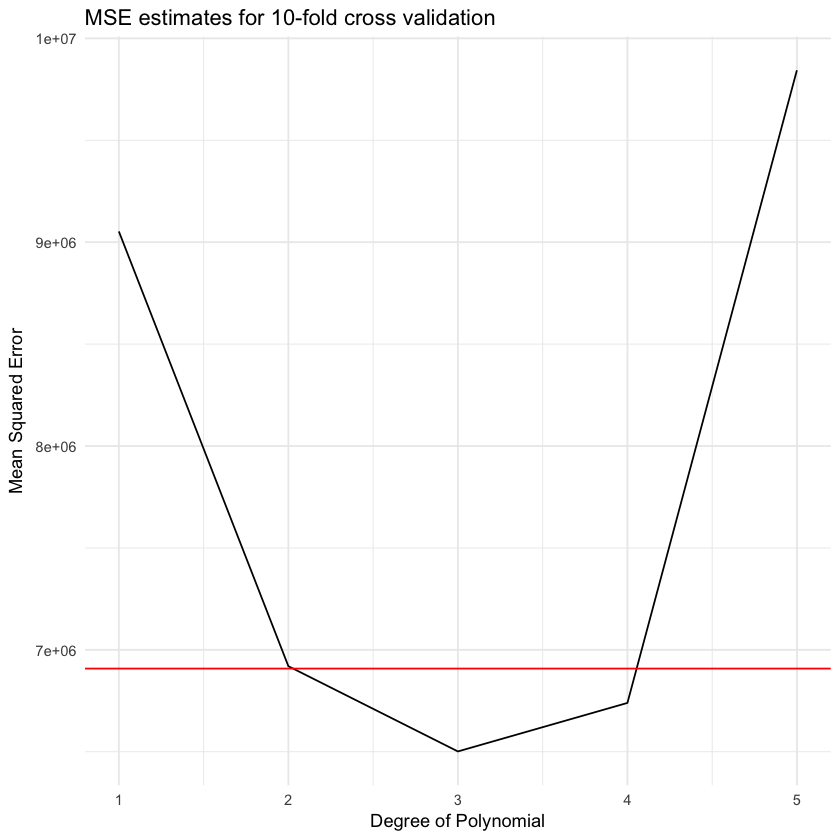

In [169]:
cv10_college_data <- crossv_kfold(college_data, k = 10)
cv10_error_fold10 <- vector("numeric", 5)
terms <- 1:5

for(i in terms){
  cv10_college_model2 <- map(cv10_college_data$train, ~ lm(Outstate ~ poly(Expend, i), data = .))
  cv10_college_mse2 <- map2_dbl(cv10_college_model2, cv10_college_data$test, mse)
  cv10_error_fold10[[i]] <- mean(cv10_college_mse2)
}

data_frame(terms = terms,
           fold10 = cv10_error_fold10) %>%
  ggplot(aes(terms, fold10)) +
    geom_line() +
    labs(title = "MSE estimates for 10-fold cross validation",
         x = "Degree of Polynomial",
         y = "Mean Squared Error") +
    geom_hline(aes(color = 'Log(Expend) MSE', yintercept = log_mse)) + 
    theme(legend.position = 'bottom')


The 10-fold cross-validation between different degrees of polynomials and log transformation model shows that 3 degree of polynomial can actually generate lower mse. So we now try polynomials transformation for 3 degree.

term,estimate,std.error,statistic,p.value
(Intercept),-1.24e+03,5.60e+02,-2.22,2.70e-02
I(Expend^1),1.70e+00,1.09e-01,15.57,9.57e-48
I(Expend^2),-4.63e-05,5.76e-06,-8.04,3.30e-15
I(Expend^3),3.95e-10,8.04e-11,4.91,1.08e-06


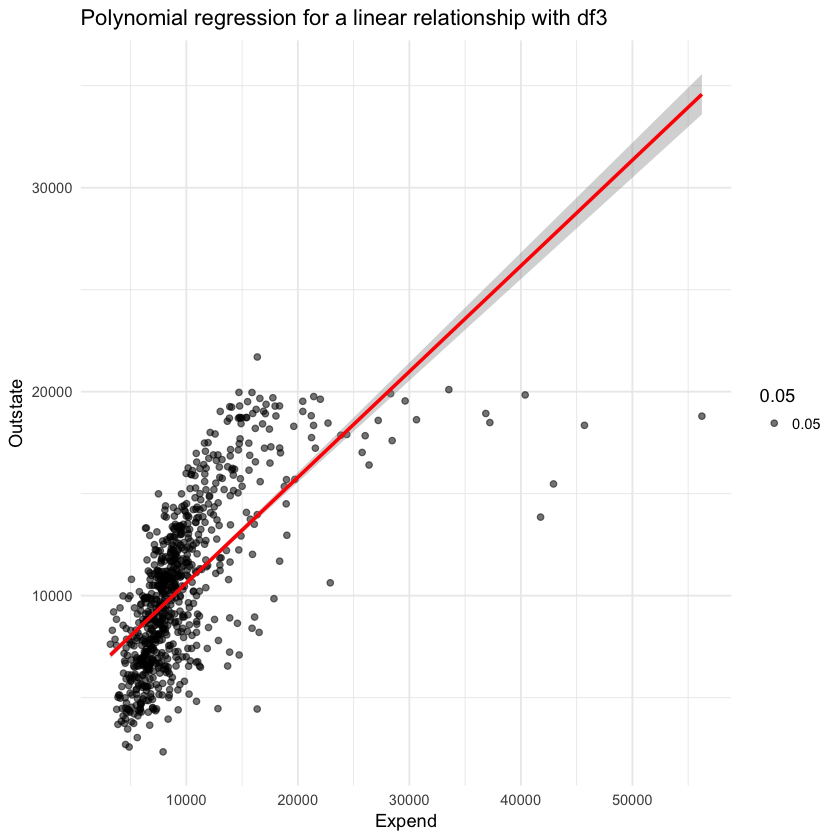

In [170]:
##Polynomial regressions

model3 <- glm(Outstate ~ I(Expend^1) + I(Expend^2) + I(Expend^3), data = college_data)
tidy(model3)

grid3 <- college_data %>%
  add_predictions(model3, var = "pred3")


##plot
ggplot(grid3, aes(x = Expend)) +
  geom_point(data = college_data, aes(y = Outstate, alpha = .05)) +
  geom_smooth(method = "lm", aes(y = pred3), color = 'red') +
  labs(title = "Polynomial regression for a linear relationship with df3")


In [171]:
##$10$-fold cross-validation approach

cv10_college_model3 <- map(cv10_college_data$train, ~ glm(Outstate ~ I(Expend^1) + I(Expend^2) + I(Expend^3), data = .))
cv10_college_mse3 <- map2_dbl(cv10_college_model3, cv10_college_data$test, mse)
mean(cv10_college_mse3)


[1] 6501561

The 10-fold cross-validation methods generate mse = 6501560.58202698, which decrease a lot compare with mse of the model1 = 6890220.52725771. So this model is better. This model is $$Outstate = \beta_{0} + \beta_{1} * Expend + beta_{2} * (Expend)^{2} + beta_{3} * (Expend)^{3} + \epsilon$$

Second predictor: Graduation rate
--------


Call:
glm(formula = Outstate ~ Grad.Rate, data = college_data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-11222   -2252    -161    2157   12659  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1681.9      467.3     3.6  0.00034 ***
Grad.Rate      133.8        6.9    19.4  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 10916506)

    Null deviance: 1.2559e+10  on 776  degrees of freedom
Residual deviance: 8.4603e+09  on 775  degrees of freedom
AIC: 14801

Number of Fisher Scoring iterations: 2


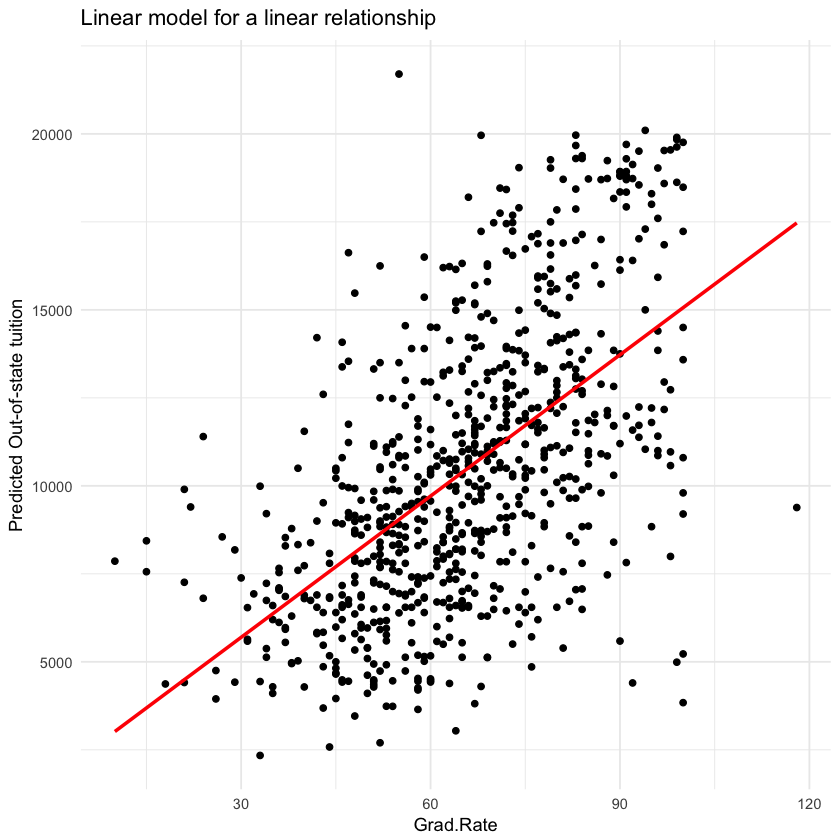

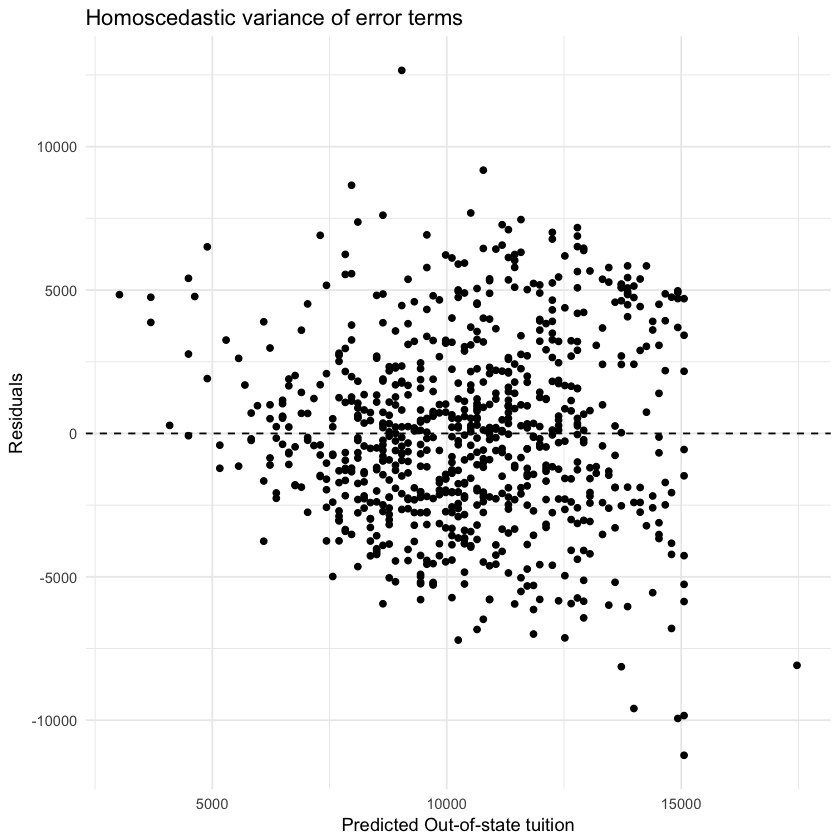

In [176]:
# ###first model: No transformation
model1_gr <- glm(Outstate ~ Grad.Rate, data = college_data)
summary(model1_gr)

grid1_gr <- college_data %>%
  add_predictions(model1_gr) %>%
  add_residuals(model1_gr) 


##plot
ggplot(grid1_gr, aes(x = Grad.Rate)) +
  geom_point(aes(y = Outstate)) +
  geom_smooth(method = "lm", aes(y = pred), color = 'red') +
  labs(title = "Linear model for a linear relationship", y = "Predicted Out-of-state tuition")

ggplot(grid1_gr, aes(x = pred)) +
  geom_point(aes(y = resid)) +
  geom_hline(yintercept = 0, linetype = 2) +
  labs(title = "Homoscedastic variance of error terms",
        x = "Predicted Out-of-state tuition",
        y = "Residuals")

In order to find the statistics relationship between grad.rate and Outstate tuition, I first fit a simple no transformation linear model 
$$Outstate = \beta_{0} + \beta_{1} * Grad.Rate +\epsilon$$
From the summary table, we could know the coefficient of Grade.Rate is 133.8, which means with one unit increase in Grade.Rate, the Outstate tuition will increase 133.8. The p-valeu < 0.05, and this could testify the statistics significant of Expand predictor. The residuals seem to be randomly located around 0. Also, from the first plot, we could see that the data fit the model well. To see if we could improve the model, I try to use cross validation to do piecewise polynomial.

[1] 1.1e+07

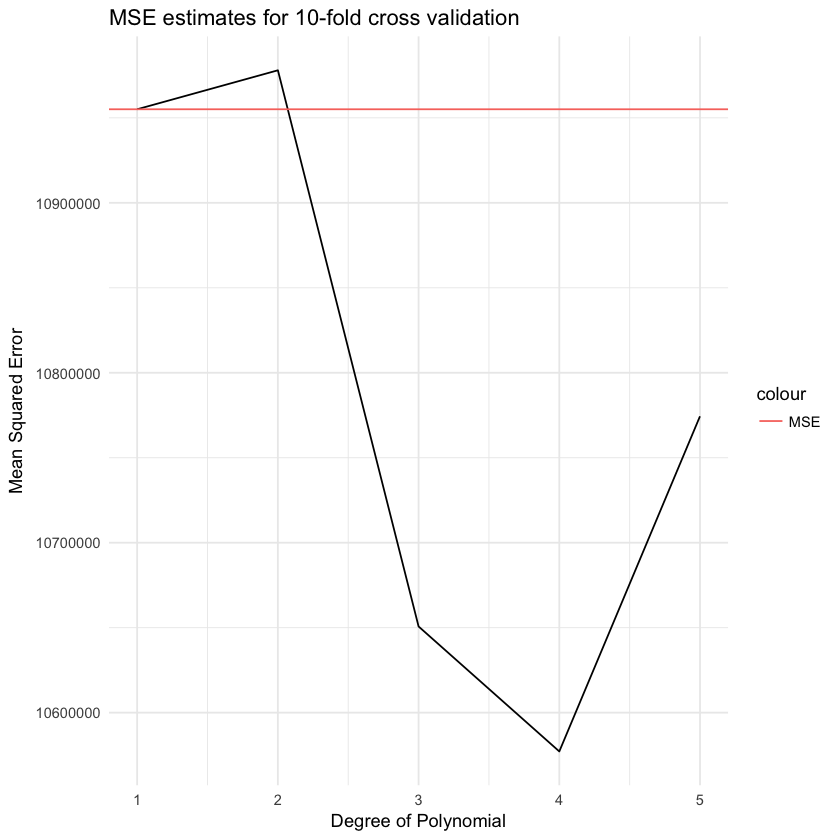

In [190]:
##$10$-fold cross-validation approach

cv10_college_model2 <- map(cv10_college_data$train, ~ glm(Outstate ~ Grad.Rate, data = .))
cv10_college_mse2 <- map2_dbl(cv10_college_model2, cv10_college_data$test, mse)
log_mse <- mean(cv10_college_mse2)
log_mse

cv10_error_fold10 <- vector("numeric", 5)
terms <- 1:5

for(i in terms){
  cv10_college_model2 <- map(cv10_college_data$train, ~ lm(Outstate ~ poly(Grad.Rate, i), data = .))
  cv10_college_mse2 <- map2_dbl(cv10_college_model2, cv10_college_data$test, mse)
  cv10_error_fold10[[i]] <- mean(cv10_college_mse2)
}

data_frame(terms = terms,
           fold10 = cv10_error_fold10) %>%
  ggplot(aes(terms, fold10)) +
    geom_line() +
    geom_hline(aes(color = 'MSE', yintercept = log_mse)) + 
    labs(title = "MSE estimates for 10-fold cross validation",
         x = "Degree of Polynomial",
         y = "Mean Squared Error")


So from the mse for 10-fold cv method of the non transformation model is 10955042.0502037. After see the graph above, we could know that 4-degree polynomial can provides minimum MSE.

term,estimate,std.error,statistic,p.value
(Intercept),7.94e+03,4.21e+03,1.8861,0.0597
I(Grad.Rate^1),-5.00e+00,3.17e+02,-0.0158,0.9874
I(Grad.Rate^2),-3.84e+00,8.45e+00,-0.4550,0.6492
I(Grad.Rate^3),1.12e-01,9.45e-02,1.1808,0.2381
I(Grad.Rate^4),-6.63e-04,3.77e-04,-1.7587,0.0790


[1] 10577173

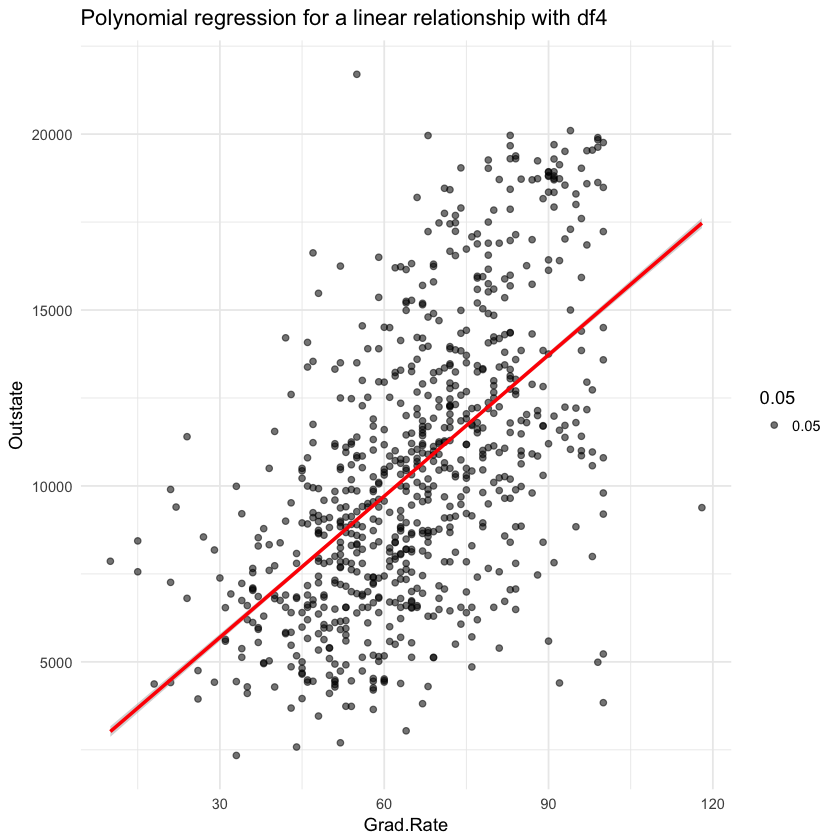

In [185]:
##Polynomial regressions

model3 <- glm(Outstate ~ I(Grad.Rate^1) + I(Grad.Rate^2) + I(Grad.Rate^3) + I(Grad.Rate^4), data = college_data)
tidy(model3)

grid3 <- college_data %>%
  add_predictions(model3, var = "pred3")


##plot
ggplot(grid3, aes(x = Grad.Rate)) +
  geom_point(data = college_data, aes(y = Outstate, alpha = .05)) +
  geom_smooth(method = "lm", aes(y = pred3), color = 'red') +
  labs(title = "Polynomial regression for a linear relationship with df4")

## mse
cv10_error_fold10[4]

The new model is $$Outstate = \beta_{0} + \beta_{1} * Grad.Rate + beta_{2} * (Grad.Rate)^{2} + beta_{3} * (Grad.Rate)^{3} + beta_{4} * (Grad.Rate)^{4} + \epsilon$$
The mse of this model is 10577173.0711689 and this model seems better for Grad.Rate.

third predictor: S.F.Ratio
------


Call:
glm(formula = Outstate ~ S.F.Ratio, data = college_data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-10168   -2637    -252    2268   13267  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18385.6      444.5    41.4   <2e-16 ***
S.F.Ratio     -563.9       30.4   -18.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 11217046)

    Null deviance: 1.2559e+10  on 776  degrees of freedom
Residual deviance: 8.6932e+09  on 775  degrees of freedom
AIC: 14822

Number of Fisher Scoring iterations: 2


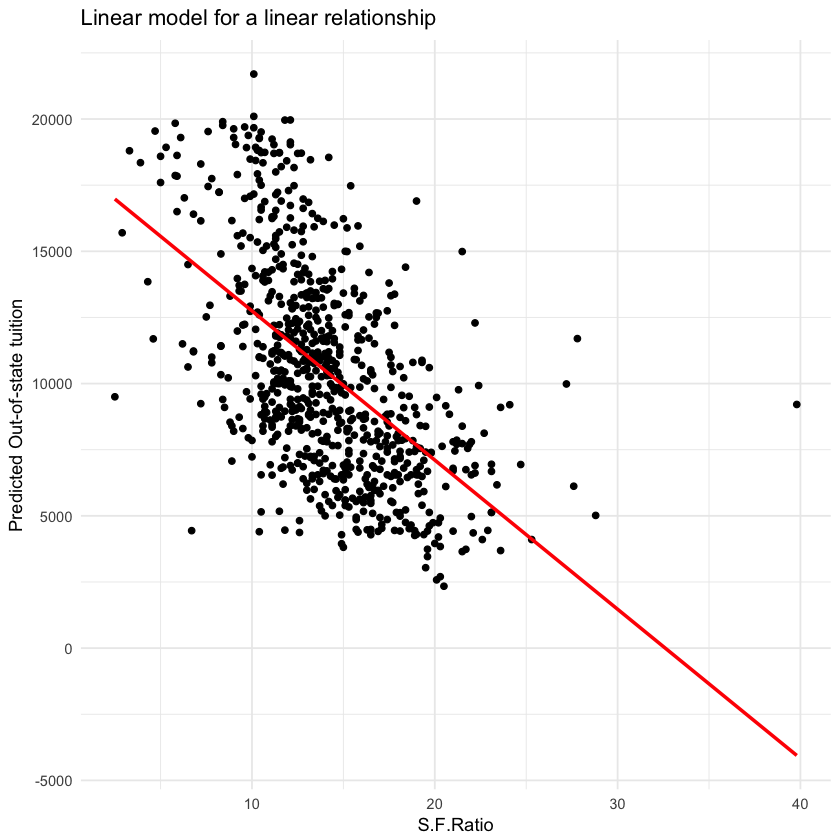

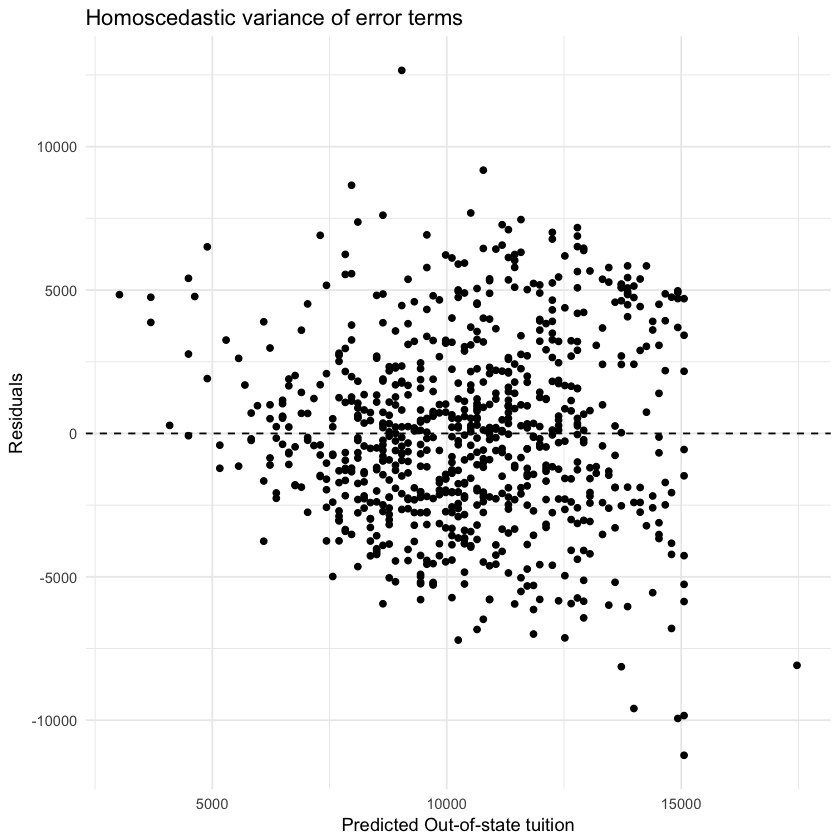

In [186]:
# ###first model: No transformation
model1_sf <- glm(Outstate ~ S.F.Ratio, data = college_data)
summary(model1_sf)

grid1_sf <- college_data %>%
  add_predictions(model1_sf) %>%
  add_residuals(model1_sf) 


##plot
ggplot(grid1_sf, aes(x = S.F.Ratio)) +
  geom_point(aes(y = Outstate)) +
  geom_smooth(method = "lm", aes(y = pred), color = 'red') +
  labs(title = "Linear model for a linear relationship", y = "Predicted Out-of-state tuition")

ggplot(grid1_gr, aes(x = pred)) +
  geom_point(aes(y = resid)) +
  geom_hline(yintercept = 0, linetype = 2) +
  labs(title = "Homoscedastic variance of error terms",
        x = "Predicted Out-of-state tuition",
        y = "Residuals")

In order to find the statistics relationship between S.F.Ratio and Outstate tuition, I first fit a simple no transformation linear model 
$$Outstate = \beta_{0} + \beta_{1} * S.F.Ratio +\epsilon$$
From the summary table, we could know the coefficient of S.F.Ratio is -563.9 , which means with one unit increase in S.F.Ratio, the Outstate tuition will decrease 563.9. The p-valeu < 0.05, and this could testify the statistics significant of Expand predictor. The residuals seem to be randomly located around 0. Also, from the first plot, we could see that the data fit the model well. To see if we could improve the model, I try to use cross validation to do piecewise polynomial.

[1] 11270333

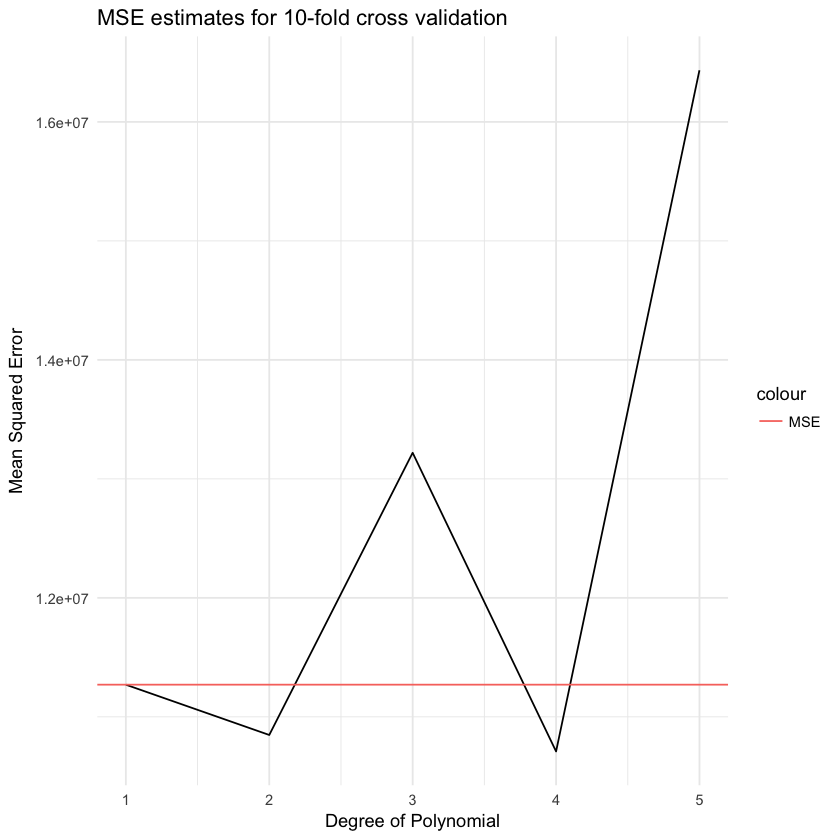

In [189]:
##$10$-fold cross-validation approach

cv10_college_model2 <- map(cv10_college_data$train, ~ glm(Outstate ~ S.F.Ratio, data = .))
cv10_college_mse2 <- map2_dbl(cv10_college_model2, cv10_college_data$test, mse)
log_mse <- mean(cv10_college_mse2)
log_mse

cv10_error_fold10 <- vector("numeric", 5)
terms <- 1:5

for(i in terms){
  cv10_college_model2 <- map(cv10_college_data$train, ~ lm(Outstate ~ poly(S.F.Ratio, i), data = .))
  cv10_college_mse2 <- map2_dbl(cv10_college_model2, cv10_college_data$test, mse)
  cv10_error_fold10[[i]] <- mean(cv10_college_mse2)
}

data_frame(terms = terms,
           fold10 = cv10_error_fold10) %>%
  ggplot(aes(terms, fold10)) +
    geom_line() +
    geom_hline(aes(color = 'MSE', yintercept = log_mse)) + 
    labs(title = "MSE estimates for 10-fold cross validation",
         x = "Degree of Polynomial",
         y = "Mean Squared Error")

We could know that the mse for the no transformation model is 11270332.6439016. Although, from piecewise polynomial graph, we could know that when df = 4, the mse could be minimize. However,the change is not that significant. So we could keep to the no transformation model in order to prevent overfitting problem.

Part 3: College (GAM) [3 points]
-----------

In [ ]:
set.seed(1234)

1.Split the data into a training set and a test set.
-------

In [ ]:
require(mgcv)
library(mgcv)
library(splines)
install.packages('gam')
library(gam)
GAM_college_data = read.csv(file = "College.csv", header = T)

I don't know why I can't install the gam packages, so then I use R markdown to write part3. 
--------

Warning message in install.packages(update[instlib == l, "Package"], l, contriburl = contriburl, :
“installation of package ‘nlme’ had non-zero exit status”Warning message in install.packages(update[instlib == l, "Package"], l, contriburl = contriburl, :
“installation of package ‘openssl’ had non-zero exit status”Warning message in install.packages(update[instlib == l, "Package"], l, contriburl = contriburl, :
“installation of package ‘pbdZMQ’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [204]:
install.packages('gam')
library(gam)

Warning message in install.packages("gam"):
“installation of package ‘gam’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(gam): there is no package called ‘gam’
